In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [38]:
df = pd.read_csv('1992_Calculations_Subset.txt')

In [39]:
df.head()

,Unnamed: 0,CAPE,CAPE_Tv,CIN,CIN_Tv,Date,Station,Time
0,0,27.248069,8.930822,-21.310648,0.0,1992-05-01,ABQ,0
1,1,0.000000,0.000000,0.000000,0.0,1992-05-01,ALB,0
2,2,211.789649,29.864951,-361.941699,0.0,1992-05-01,BIS,0
3,3,88.005267,95.530076,-13.110684,0.0,1992-05-01,BNA,0
4,4,0.000000,0.000000,0.000000,0.0,1992-05-01,BOI,0


In [40]:
# Calculate the absolute difference between corrected and uncorrected CAPE/CIN values
df['CAPE_Abs_Difference'] = df['CAPE'] - df['CAPE_Tv']
df['CIN_Abs_Difference'] = df['CIN'] - df['CIN_Tv']

# Calculate the relative difference between corrected and uncorrected CAPE/CIN values
df['CAPE_Rel_Difference'] = df['CAPE_Abs_Difference'] / df['CAPE_Tv']
df['CIN_ARel_Difference'] = df['CIN_Abs_Difference'] / df['CIN_Tv']

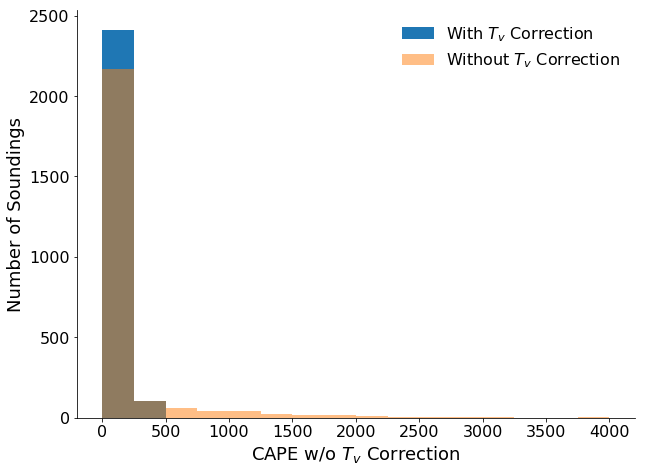

In [41]:
# Cape Histogram
# Setup figure and axes
# Generally plots is ~1.33x width to height (10,7.5 or 12,9)
fig = plt.figure(figsize=(10,7.5))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CAPE w/o $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Number of Soundings', fontsize=18)

# Turns off chart clutter

# Turn off top and right tick marks 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  

# Turn off top and right splines
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False) 

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Plotting
bin_edges = np.arange(0, 4200, 250)
ax1.hist(df['CAPE_Tv'], bins=bin_edges, alpha=1, label='With $T_v$ Correction')
ax1.hist(df['CAPE'], bins=bin_edges, alpha=0.5, label='Without $T_v$ Correction')

plt.legend(fontsize=16, frameon=False)

# Set limits
#ax1.set_xlim(0,200)
#ax1.set_ylim(0,200)

plt.savefig('../Plots/1992_CAPE_Histogram.png', bbox_inches="tight");  

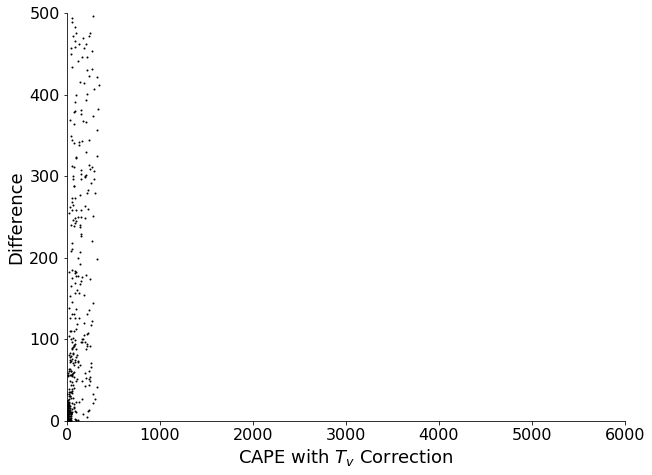

In [42]:
# Cape Histogram
# Setup figure and axes
# Generally plots is ~1.33x width to height (10,7.5 or 12,9)
fig = plt.figure(figsize=(10,7.5))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CAPE with $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Difference', fontsize=18)

# Turns off chart clutter

# Turn off top and right tick marks 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  

# Turn off top and right splines
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False) 

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Plotting
ax1.plot(df['CAPE_Tv'], df['CAPE_Abs_Difference'], color='k', linestyle='None', marker='o', markersize=1)

# Set limits
ax1.set_xlim(0,6000)
ax1.set_ylim(0,500)

plt.savefig('../Plots/1992_CAPE_Absolute_Difference.png', bbox_inches="tight");  

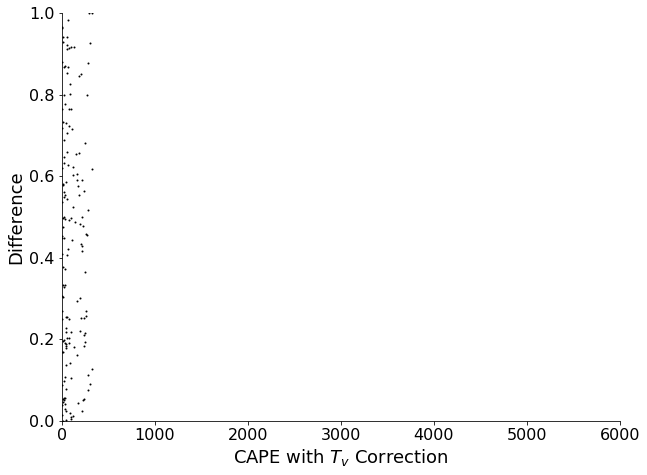

In [43]:
# Cape Histogram
# Setup figure and axes
# Generally plots is ~1.33x width to height (10,7.5 or 12,9)
fig = plt.figure(figsize=(10,7.5))
ax1 = plt.subplot(111)

# Set labels and tick sizes
ax1.set_xlabel('CAPE with $T_v$ Correction', fontsize=18)
ax1.set_ylabel(r'Difference', fontsize=18)

# Turns off chart clutter

# Turn off top and right tick marks 
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  

# Turn off top and right splines
ax1.spines["top"].set_visible(False)  
ax1.spines["right"].set_visible(False) 

# Turn up label sizes
ax1.tick_params(axis='both', which='major', labelsize=16)
ax1.tick_params(axis='both', which='minor', labelsize=12)

# Plotting
ax1.plot(df['CAPE_Tv'], df['CAPE_Rel_Difference'], color='k', linestyle='None', marker='o', markersize=1)

# Set limits
ax1.set_xlim(0,6000)
ax1.set_ylim(0,1)

plt.savefig('../Plots/1992_CAPE_Relative_Difference.png', bbox_inches="tight");  